# Text Classification - Genre Prediction
### Reading Data

In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv('Education.csv')
df2 = pd.read_csv('Finance.csv')
df3 = pd.read_csv('Politics.csv')
df4 = pd.read_csv('Sports.csv')

df1['Category'] = 'Education'
df2['Category'] = 'Finance'
df3['Category'] = 'Politics'
df4['Category'] = 'Sports'

#print shapes of dataframes
print("Shape of Education dataframe: ", df1.shape)
print("Shape of Finance dataframe: ", df2.shape)
print("Shape of Politics dataframe: ", df3.shape)
print("Shape of Sports dataframe: ", df4.shape)

Shape of Education dataframe:  (52, 3)
Shape of Finance dataframe:  (48, 3)
Shape of Politics dataframe:  (53, 3)
Shape of Sports dataframe:  (56, 3)


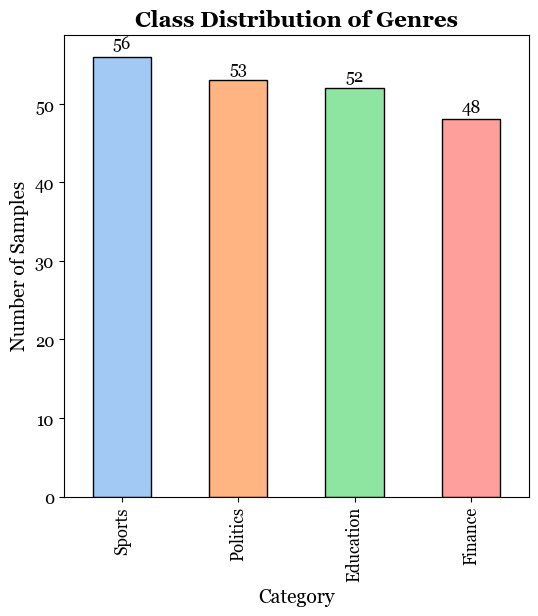

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.concat([df1, df2, df3, df4], ignore_index=True)

colors = sns.color_palette("pastel", df['Category'].nunique())
plt.figure(figsize=(6, 6))

ax = df['Category'].value_counts().plot(
    kind='bar',
    color=colors,
    edgecolor='black',  
    linewidth=1.0  
)

plt.title('Class Distribution of Genres', fontname='Georgia', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontname='Georgia', fontsize=14)
plt.ylabel('Number of Samples', fontname='Georgia', fontsize=14)
#show values above the bars
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + 0.5, str(i.get_height()), ha='center', va='bottom', fontname='Georgia', fontsize=12)
#x axis values and y axis values with font georgia and fontsize 12
plt.xticks(fontname='Georgia', fontsize=12)
plt.yticks(fontname='Georgia', fontsize=12)

plt.show()

### Pre-Processing Data

In [74]:
#Make all the dataframes have the same number of rows which is the minimum of all the dataframes
min_rows = min(df1.shape[0], df2.shape[0], df3.shape[0], df4.shape[0])
df1 = df1.sample(n=min_rows)
df2 = df2.sample(n=min_rows)
df3 = df3.sample(n=min_rows)
df4 = df4.sample(n=min_rows)

#print the shape 
print("Shape of Education dataframe: ", df1.shape)
print("Shape of Finance dataframe: ", df2.shape)
print("Shape of Politics dataframe: ", df3.shape)
print("Shape of Sports dataframe: ", df4.shape)

#Concatenate all the dataframes
df = pd.concat([df1, df2, df3, df4])
df.head()

Shape of Education dataframe:  (48, 3)
Shape of Finance dataframe:  (48, 3)
Shape of Politics dataframe:  (48, 3)
Shape of Sports dataframe:  (48, 3)


,Text,Label,Category
8,Charter schools offer alternatives to traditio...,positive,Education
1,Critics argue that recent improvements in the ...,negative,Education
47,Educational policies should be responsive to t...,negative,Education
15,Standardized curricula limit teachers' creativ...,negative,Education
17,Privatization efforts in education prioritize ...,negative,Education


In [75]:
df.shape

(192, 3)

In [76]:
#now shuffle the data
df = df.sample(frac=1).reset_index(drop=True)
df.shape
df.head()

,Text,Label,Category
0,Sportsmanship and fair play are essential valu...,positive,Sports
1,Public education should be funded adequately t...,negative,Education
2,Educational technology can be isolating and im...,negative,Education
3,Educators should receive more support and reco...,positive,Education
4,Financial regulations aim to strike a balance ...,positive,Finance


In [77]:
#save the dataframe to a csv file 
df.to_csv('final_project_data_FINAL.csv', index=False)

In [78]:
#for the text extract bag of words and for each sample append in the dataframe 'df'
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE)
    text = text.lower()
    text = [word for word in text.split() if word not in stopwords.words('english')]
    text = ' '.join(text)
    return text

df['Text_Preprocessed'] = df['Text'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\itzch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\itzch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,Label,Category,Text_Preprocessed
0,Sportsmanship and fair play are essential valu...,positive,Sports,sportsmanship fair play essential values athle...
1,Public education should be funded adequately t...,negative,Education,public education funded adequately ensure equi...
2,Educational technology can be isolating and im...,negative,Education,educational technology isolating impersonal hi...
3,Educators should receive more support and reco...,positive,Education,educators receive support recognition crucial ...
4,Financial regulations aim to strike a balance ...,positive,Finance,financial regulations aim strike balance marke...


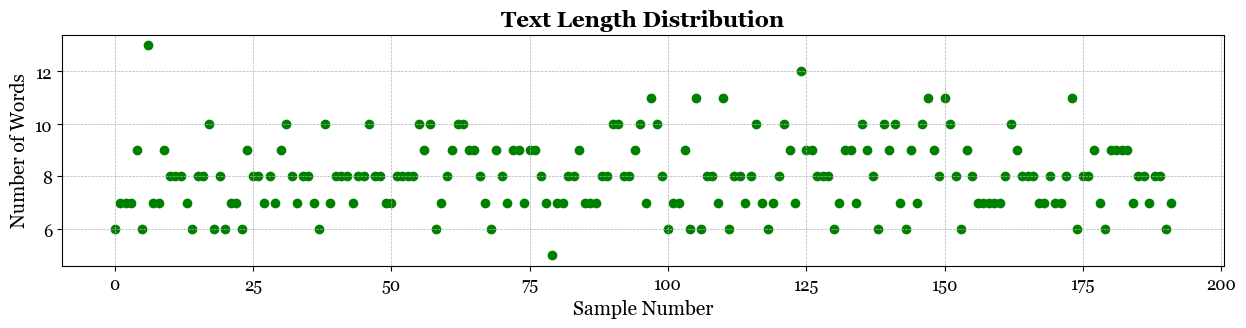

In [79]:
# calculate length of eac text in terms of words and plot as scatter plot 
df['Text_Length'] = df['Text_Preprocessed'].apply(lambda x: len(word_tokenize(x)))
df.head()

plt.figure(figsize=(15, 3))
plt.scatter(df.index, df['Text_Length'], color='green')
plt.title('Text Length Distribution', fontname='Georgia', fontsize=16, fontweight='bold')
plt.xlabel('Sample Number', fontname='Georgia', fontsize=14)
plt.ylabel('Number of Words', fontname='Georgia', fontsize=14)
plt.xticks(fontname='Georgia', fontsize=12)
plt.yticks(fontname='Georgia', fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.show()

### Feature Extraction

1. Bag of Words

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_BOW = vectorizer.fit_transform(df['Text_Preprocessed'])
X_BOW = X_BOW.toarray()
X_BOW.shape

(192, 763)

2. TF-IDF

In [81]:
#TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_TFIDF = vectorizer.fit_transform(df['Text_Preprocessed'])
X_TFIDF = X_TFIDF.toarray()
X_TFIDF.shape

(192, 763)

3. Bert Embeddings

In [82]:
#extract bert embeddings
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def extract_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt')
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state
    embeddings = torch.mean(embeddings, dim=1)
    embeddings = torch.flatten(embeddings).detach().numpy()
    return embeddings

X_BERT = df['Text_Preprocessed'].apply(extract_bert_embeddings)
X_BERT = np.array(X_BERT.tolist())
X_BERT.shape

(192, 768)

### Train Test Split - 70:30 for each feautres 

In [83]:
from sklearn.model_selection import train_test_split
X_train_BERT,X_test_BERT, y_train_BERT, y_test_BERT = train_test_split(X_BERT, df['Category'], test_size=0.3, random_state=42)

from sklearn.model_selection import train_test_split
X_train_BOW, X_test_BOW, y_train_BOW, y_test_BOW = train_test_split(X_BOW, df['Category'], test_size=0.3, random_state=42)

from sklearn.model_selection import train_test_split
X_train_TFIDF, X_test_TFIDF, y_train_TFIDF, y_test_TFIDF = train_test_split(X_TFIDF, df['Category'], test_size=0.3, random_state=42)

In [ ]:
#save the data to a file
import pickle

with open('train_test_data.pkl', 'wb') as f:
    pickle.dump([X_train_BERT, X_test_BERT, y_train_BERT, y_test_BERT, X_train_BOW, X_test_BOW, y_train_BOW, y_test_BOW, X_train_TFIDF, X_test_TFIDF, y_train_TFIDF, y_test_TFIDF], f)
print("Data Saved Successfully")


In [84]:
#normalize the bOW and TFIDF data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_BOW = scaler.fit_transform(X_train_BOW)
X_test_BOW = scaler.transform(X_test_BOW)

scaler2 = StandardScaler()
X_train_TFIDF = scaler2.fit_transform(X_train_TFIDF)
X_test_TFIDF = scaler2.transform(X_test_TFIDF)


In [85]:
#encode the target variable
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_BERT = encoder.fit_transform(y_train_BERT)
y_test_BERT = encoder.transform(y_test_BERT)

encoder = LabelEncoder()
y_train_BOW = encoder.fit_transform(y_train_BOW)
y_test_BOW = encoder.transform(y_test_BOW)

encoder = LabelEncoder()
y_train_TFIDF = encoder.fit_transform(y_train_TFIDF)
y_test_TFIDF = encoder.transform(y_test_TFIDF)


### Classifier - Gradient Booster

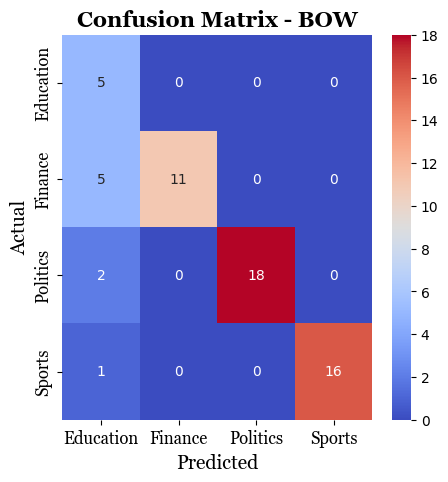

Accuracy - BOW:  0.8620689655172413
F1 Score - BOW:  0.8835695124261366
Classification Report - BOW: 
               precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.69      0.81        16
           2       1.00      0.90      0.95        20
           3       1.00      0.94      0.97        17

    accuracy                           0.86        58
   macro avg       0.85      0.88      0.82        58
weighted avg       0.95      0.86      0.88        58



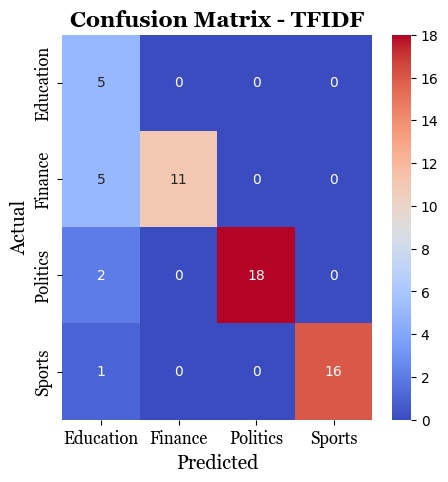

Accuracy - TFIDF:  0.8620689655172413
F1 Score - TFIDF:  0.8835695124261366
Classification Report - TFIDF: 
               precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.69      0.81        16
           2       1.00      0.90      0.95        20
           3       1.00      0.94      0.97        17

    accuracy                           0.86        58
   macro avg       0.85      0.88      0.82        58
weighted avg       0.95      0.86      0.88        58



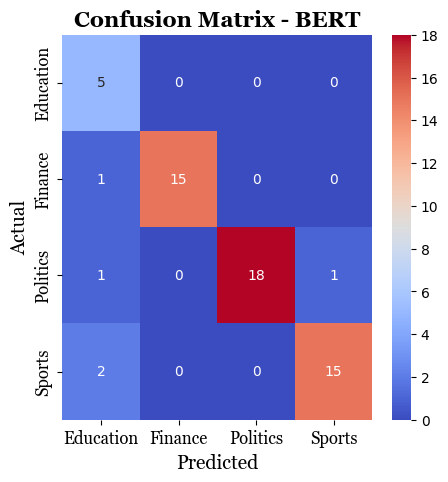

Accuracy - BERT:  0.9137931034482759
F1 Score - BERT:  0.9216760933580791
Classification Report - BERT: 
               precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.94      0.97        16
           2       1.00      0.90      0.95        20
           3       0.94      0.88      0.91        17

    accuracy                           0.91        58
   macro avg       0.87      0.93      0.88        58
weighted avg       0.94      0.91      0.92        58



,Feature Extraction Technique,Accuracy,F1 Score
0,BOW,0.862069,0.883570
1,TFIDF,0.862069,0.883570
2,BERT,0.913793,0.921676


In [86]:
# Classifier - Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gb1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb1.fit(X_train_BOW, y_train_BOW)

gb2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb2.fit(X_train_TFIDF, y_train_TFIDF)

gb3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb3.fit(X_train_BERT, y_train_BERT)


#Evaluation - accuracy, f1 score, confusion matrix, classification report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

#BOW-----------------------------------------------------------------------------------------------------------------
y_pred_BOW = gb1.predict(X_test_BOW)
accuracy_BOW = accuracy_score(y_test_BOW, y_pred_BOW)
f1_BOW = f1_score(y_test_BOW, y_pred_BOW, average='weighted')
conf_matrix_BOW = confusion_matrix(y_test_BOW, y_pred_BOW)
class_report_BOW = classification_report(y_test_BOW, y_pred_BOW)

#Confusion Matrix as heatmap wth seaborn and annot=True
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_BOW, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - BOW', fontname='Georgia', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='Georgia', fontsize=14)
plt.ylabel('Actual', fontname='Georgia', fontsize=14)
plt.xticks(fontname='Georgia', fontsize=12)
plt.yticks(fontname='Georgia', fontsize=12)
plt.show()

#display scores
print("Accuracy - BOW: ", accuracy_BOW)
print("F1 Score - BOW: ", f1_BOW)
print("Classification Report - BOW: \n", class_report_BOW)

#TFIDF--------------------------------------------------------------------------------------------
y_pred_TFIDF = gb2.predict(X_test_TFIDF)
accuracy_TFIDF = accuracy_score(y_test_TFIDF, y_pred_TFIDF)
f1_TFIDF = f1_score(y_test_TFIDF, y_pred_TFIDF, average='weighted')
conf_matrix_TFIDF = confusion_matrix(y_test_TFIDF, y_pred_TFIDF)
class_report_TFIDF = classification_report(y_test_TFIDF, y_pred_TFIDF)

#Confusion Matrix as heatmap wth seaborn and annot=True
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_TFIDF, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)    
plt.title('Confusion Matrix - TFIDF', fontname='Georgia', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='Georgia', fontsize=14)
plt.ylabel('Actual', fontname='Georgia', fontsize=14)
plt.xticks(fontname='Georgia', fontsize=12)
plt.yticks(fontname='Georgia', fontsize=12)
plt.show()

#display scores
print("Accuracy - TFIDF: ", accuracy_TFIDF)
print("F1 Score - TFIDF: ", f1_TFIDF)
print("Classification Report - TFIDF: \n", class_report_TFIDF)


#BERT----------------------------------------------------------------------------------------------------------------------------
y_pred_BERT = gb3.predict(X_test_BERT)
accuracy_BERT = accuracy_score(y_test_BERT, y_pred_BERT)
f1_BERT = f1_score(y_test_BERT, y_pred_BERT, average='weighted')
conf_matrix_BERT = confusion_matrix(y_test_BERT, y_pred_BERT)

class_report_BERT = classification_report(y_test_BERT, y_pred_BERT)

#Confusion Matrix as heatmap wth seaborn and annot=True
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_BERT, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - BERT', fontname='Georgia', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='Georgia', fontsize=14)
plt.ylabel('Actual', fontname='Georgia', fontsize=14)
plt.xticks(fontname='Georgia', fontsize=12)
plt.yticks(fontname='Georgia', fontsize=12)
plt.show()

#display scores
print("Accuracy - BERT: ", accuracy_BERT)
print("F1 Score - BERT: ", f1_BERT)
print("Classification Report - BERT: \n", class_report_BERT)

#Display the scores in a table and the best feature extraction technique
import pandas as pd

data = {
    'Feature Extraction Technique': ['BOW', 'TFIDF', 'BERT'],
    'Accuracy': [accuracy_BOW, accuracy_TFIDF, accuracy_BERT],
    'F1 Score': [f1_BOW, f1_TFIDF, f1_BERT]
}

df_scores = pd.DataFrame(data)
df_scores

#best model with feature extraciton technique
best_model = df_scores.loc[df_scores['F1 Score'].idxmax()]
best_model

df_scores.head()

C:\Users\itzch\AppData\Local\Temp\ipykernel_8512\57170953.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_accuracy = cm.get_cmap('Blues', len(df_scores))
C:\Users\itzch\AppData\Local\Temp\ipykernel_8512\57170953.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_f1 = cm.get_cmap('Reds', len(df_scores))


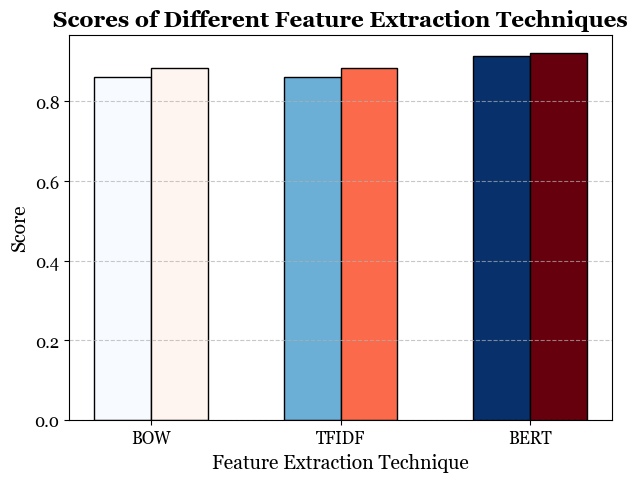

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm  # To generate a colormap

# Assuming df_scores is a pandas DataFrame with columns 'Feature Extraction Technique', 'Accuracy', and 'F1 Score'

# Generate positions for grouped bars
x = np.arange(len(df_scores['Feature Extraction Technique']))  # the label locations
width = 0.3  # width of the bars

# Generate a colormap for varied colors
colors_accuracy = cm.get_cmap('Blues', len(df_scores))
colors_f1 = cm.get_cmap('Reds', len(df_scores))

plt.figure(figsize=(7, 5))

# Plot bars for Accuracy with borders and varied colors
for i in range(len(x)):
    plt.bar(
        x[i] - width/2, df_scores['Accuracy'][i], width, 
        color=colors_accuracy(i / len(x)), edgecolor='black', label='Accuracy' if i == 0 else ""
    )

# Plot bars for F1 Score with borders and varied colors
for i in range(len(x)):
    plt.bar(
        x[i] + width/2, df_scores['F1 Score'][i], width, 
        color=colors_f1(i / len(x)), edgecolor='black', label='F1 Score' if i == 0 else ""
    )

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.title('Scores of Different Feature Extraction Techniques', fontname='Georgia', fontsize=16, fontweight='bold')
plt.xlabel('Feature Extraction Technique', fontname='Georgia', fontsize=14)
plt.ylabel('Score', fontname='Georgia', fontsize=14)

# Add x-ticks with labels
plt.xticks(x, df_scores['Feature Extraction Technique'], fontname='Georgia', fontsize=12)

# Add y-ticks
plt.yticks(fontname='Georgia', fontsize=12)



# Show the plot
plt.show()


### Classifier - ID3

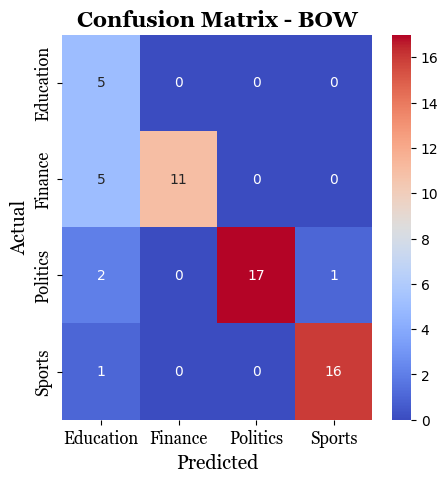

Accuracy - BOW:  0.8448275862068966
F1 Score - BOW:  0.865399882641262
Classification Report - BOW: 
               precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.69      0.81        16
           2       1.00      0.85      0.92        20
           3       0.94      0.94      0.94        17

    accuracy                           0.84        58
   macro avg       0.83      0.87      0.81        58
weighted avg       0.93      0.84      0.87        58



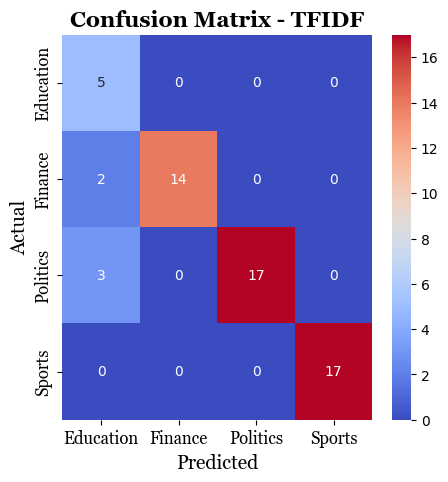

Accuracy - TFIDF:  0.9137931034482759
F1 Score - TFIDF:  0.9249145697421559
Classification Report - TFIDF: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.88      0.93        16
           2       1.00      0.85      0.92        20
           3       1.00      1.00      1.00        17

    accuracy                           0.91        58
   macro avg       0.88      0.93      0.88        58
weighted avg       0.96      0.91      0.92        58



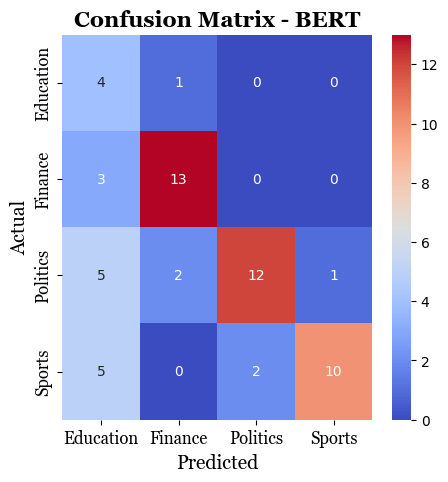

Accuracy - BERT:  0.6724137931034483
F1 Score - BERT:  0.7082532072390084
Classification Report - BERT: 
               precision    recall  f1-score   support

           0       0.24      0.80      0.36         5
           1       0.81      0.81      0.81        16
           2       0.86      0.60      0.71        20
           3       0.91      0.59      0.71        17

    accuracy                           0.67        58
   macro avg       0.70      0.70      0.65        58
weighted avg       0.81      0.67      0.71        58

Feature Extraction Technique       TFIDF
Accuracy                        0.913793
F1 Score                        0.924915
Name: 1, dtype: object


C:\Users\itzch\AppData\Local\Temp\ipykernel_8512\2517349125.py:121: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_accuracy = cm.get_cmap('Blues', len(df_scores))
C:\Users\itzch\AppData\Local\Temp\ipykernel_8512\2517349125.py:122: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_f1 = cm.get_cmap('Reds', len(df_scores))


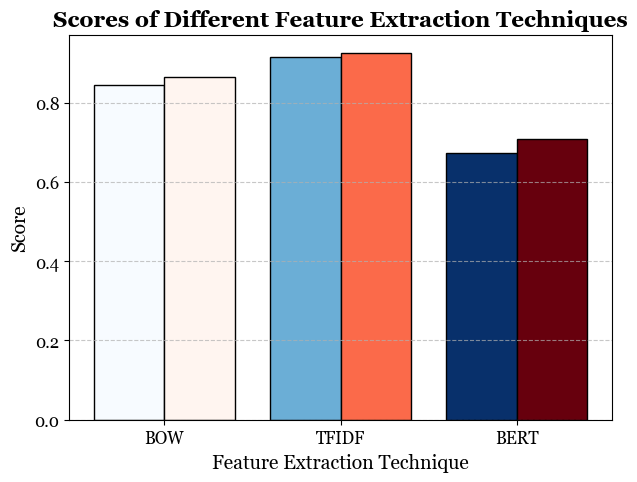

,Feature Extraction Technique,Accuracy,F1 Score
0,BOW,0.844828,0.865400
1,TFIDF,0.913793,0.924915
2,BERT,0.672414,0.708253


In [94]:
#same process with ID3
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier()
dt1.fit(X_train_BOW, y_train_BOW)

dt2 = DecisionTreeClassifier()
dt2.fit(X_train_TFIDF, y_train_TFIDF)

dt3 = DecisionTreeClassifier()
dt3.fit(X_train_BERT, y_train_BERT)

#Evaluation - accuracy, f1 score, confusion matrix, classification report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

#BOW-----------------------------------------------------------------------------------------------------------------
y_pred_BOW = dt1.predict(X_test_BOW)
accuracy_BOW = accuracy_score(y_test_BOW, y_pred_BOW)
f1_BOW = f1_score(y_test_BOW, y_pred_BOW, average='weighted')
conf_matrix_BOW = confusion_matrix(y_test_BOW, y_pred_BOW)
class_report_BOW = classification_report(y_test_BOW, y_pred_BOW)

#Confusion Matrix as heatmap wth seaborn and annot=True
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_BOW, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - BOW', fontname='Georgia', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='Georgia', fontsize=14)
plt.ylabel('Actual', fontname='Georgia', fontsize=14)
plt.xticks(fontname='Georgia', fontsize=12)

plt.yticks(fontname='Georgia', fontsize=12)
plt.show()

#display scores
print("Accuracy - BOW: ", accuracy_BOW)
print("F1 Score - BOW: ", f1_BOW)
print("Classification Report - BOW: \n", class_report_BOW)

#TFIDF--------------------------------------------------------------------------------------------
y_pred_TFIDF = dt2.predict(X_test_TFIDF)
accuracy_TFIDF = accuracy_score(y_test_TFIDF, y_pred_TFIDF)
f1_TFIDF = f1_score(y_test_TFIDF, y_pred_TFIDF, average='weighted')
conf_matrix_TFIDF = confusion_matrix(y_test_TFIDF, y_pred_TFIDF)

class_report_TFIDF = classification_report(y_test_TFIDF, y_pred_TFIDF)

#Confusion Matrix as heatmap wth seaborn and annot=True
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_TFIDF, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - TFIDF', fontname='Georgia', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='Georgia', fontsize=14)
plt.ylabel('Actual', fontname='Georgia', fontsize=14)
plt.xticks(fontname='Georgia', fontsize=12)
plt.yticks(fontname='Georgia', fontsize=12)
plt.show()

#display scores
print("Accuracy - TFIDF: ", accuracy_TFIDF)
print("F1 Score - TFIDF: ", f1_TFIDF)
print("Classification Report - TFIDF: \n", class_report_TFIDF)




#BERT----------------------------------------------------------------------------------------------------------------------------
y_pred_BERT = dt3.predict(X_test_BERT)
accuracy_BERT = accuracy_score(y_test_BERT, y_pred_BERT)
f1_BERT = f1_score(y_test_BERT, y_pred_BERT, average='weighted')
conf_matrix_BERT = confusion_matrix(y_test_BERT, y_pred_BERT)

class_report_BERT = classification_report(y_test_BERT, y_pred_BERT)

#Confusion Matrix as heatmap wth seaborn and annot=True
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_BERT, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - BERT', fontname='Georgia', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='Georgia', fontsize=14)
plt.ylabel('Actual', fontname='Georgia', fontsize=14)
plt.xticks(fontname='Georgia', fontsize=12)
plt.yticks(fontname='Georgia', fontsize=12)
plt.show()

#display scores
print("Accuracy - BERT: ", accuracy_BERT)
print("F1 Score - BERT: ", f1_BERT)
print("Classification Report - BERT: \n", class_report_BERT)

#Display the scores in a table and the best feature extraction technique
import pandas as pd

data = {
    'Feature Extraction Technique': ['BOW', 'TFIDF', 'BERT'],
    'Accuracy': [accuracy_BOW, accuracy_TFIDF, accuracy_BERT],
    'F1 Score': [f1_BOW, f1_TFIDF, f1_BERT]
}

df_scores = pd.DataFrame(data)

#best model with feature extraciton technique

best_model = df_scores.loc[df_scores['F1 Score'].idxmax()]
print(best_model)

df_scores.head()

import matplotlib.pyplot as plt

import numpy as np
import matplotlib.cm as cm  # To generate a colormap

# Assuming df_scores is a pandas DataFrame with columns 'Feature Extraction Technique', 'Accuracy', and 'F1 Score'

# Generate positions for grouped bars
x = np.arange(len(df_scores['Feature Extraction Technique']))  # the label locations
width = 0.4  # width of the bars

# Generate a colormap for varied colors
colors_accuracy = cm.get_cmap('Blues', len(df_scores))
colors_f1 = cm.get_cmap('Reds', len(df_scores))

plt.figure(figsize=(7, 5))

# Plot bars for Accuracy with borders and varied colors

for i in range(len(x)):
    plt.bar(
        x[i] - width/2, df_scores['Accuracy'][i], width, 
        color=colors_accuracy(i / len(x)), edgecolor='black', label='Accuracy' if i == 0 else ""
    )

# Plot bars for F1 Score with borders and varied colors
for i in range(len(x)):
    plt.bar(
        x[i] + width/2, df_scores['F1 Score'][i], width, 
        color=colors_f1(i / len(x)), edgecolor='black', label='F1 Score' if i == 0 else ""
    )

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.title('Scores of Different Feature Extraction Techniques', fontname='Georgia', fontsize=16, fontweight='bold')
plt.xlabel('Feature Extraction Technique', fontname='Georgia', fontsize=14)
plt.ylabel('Score', fontname='Georgia', fontsize=14)

# Add x-ticks with labels
plt.xticks(x, df_scores['Feature Extraction Technique'], fontname='Georgia', fontsize=12)

# Add y-ticks
plt.yticks(fontname='Georgia', fontsize=12)

# Show the plot
plt.show()

df_scores.head()



### Classifier - Random Forest

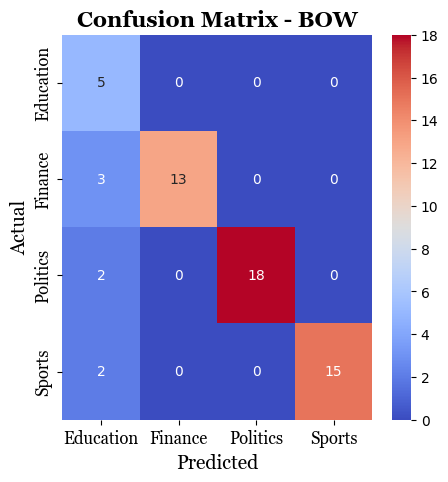

Accuracy - BOW:  0.8793103448275862
F1 Score - BOW:  0.8994978013422028
Classification Report - BOW: 
               precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.81      0.90        16
           2       1.00      0.90      0.95        20
           3       1.00      0.88      0.94        17

    accuracy                           0.88        58
   macro avg       0.85      0.90      0.84        58
weighted avg       0.95      0.88      0.90        58



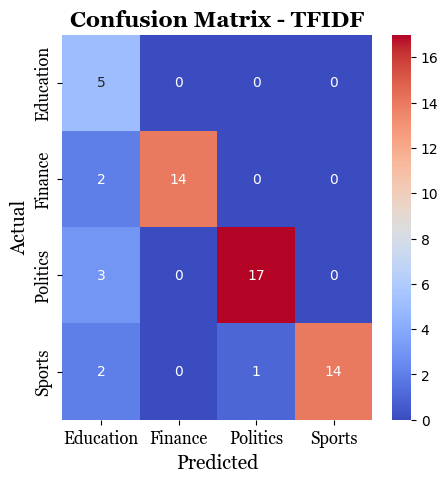

Accuracy - TFIDF:  0.8620689655172413
F1 Score - TFIDF:  0.8814497475121421
Classification Report - TFIDF: 
               precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.88      0.93        16
           2       0.94      0.85      0.89        20
           3       1.00      0.82      0.90        17

    accuracy                           0.86        58
   macro avg       0.84      0.89      0.83        58
weighted avg       0.93      0.86      0.88        58



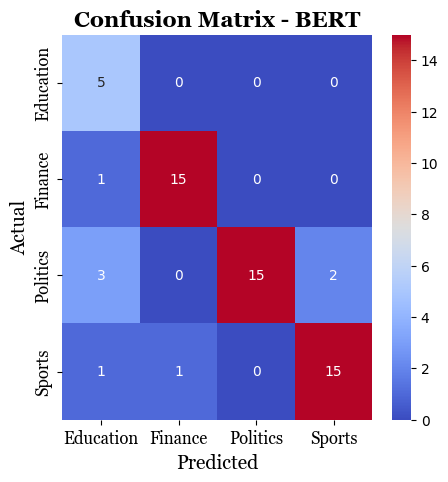

Accuracy - BERT:  0.8620689655172413
F1 Score - BERT:  0.870279146141215
Classification Report - BERT: 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       0.94      0.94      0.94        16
           2       1.00      0.75      0.86        20
           3       0.88      0.88      0.88        17

    accuracy                           0.86        58
   macro avg       0.83      0.89      0.84        58
weighted avg       0.91      0.86      0.87        58

Best Feature Extraction Technique:
 Feature Extraction Technique         BOW
Accuracy                         0.87931
F1 Score                        0.899498
Name: 0, dtype: object


C:\Users\itzch\AppData\Local\Temp\ipykernel_8512\246849643.py:97: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_accuracy = cm.get_cmap('Blues', len(df_scores))
C:\Users\itzch\AppData\Local\Temp\ipykernel_8512\246849643.py:98: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_f1 = cm.get_cmap('Reds', len(df_scores))


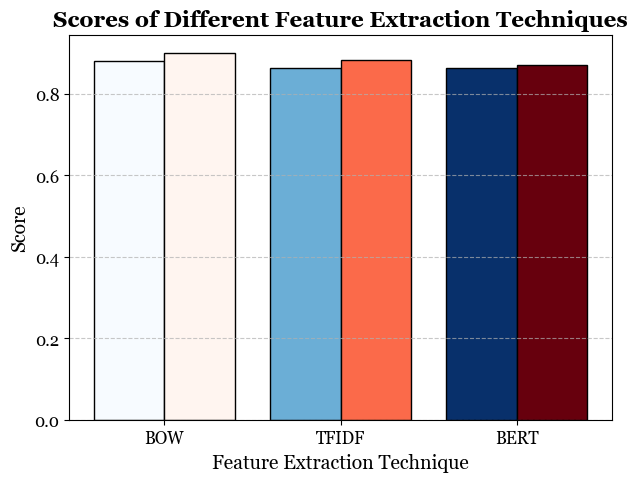

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm  # To generate a colormap

# Random Forest Classifier
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train_BOW, y_train_BOW)

rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_train_TFIDF, y_train_TFIDF)

rf3 = RandomForestClassifier(random_state=42)
rf3.fit(X_train_BERT, y_train_BERT)

# Evaluation - Accuracy, F1 Score, Confusion Matrix, Classification Report

# BOW
y_pred_BOW = rf1.predict(X_test_BOW)
accuracy_BOW = accuracy_score(y_test_BOW, y_pred_BOW)
f1_BOW = f1_score(y_test_BOW, y_pred_BOW, average='weighted')
conf_matrix_BOW = confusion_matrix(y_test_BOW, y_pred_BOW)
class_report_BOW = classification_report(y_test_BOW, y_pred_BOW)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_BOW, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - BOW', fontname='Georgia', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='Georgia', fontsize=14)
plt.ylabel('Actual', fontname='Georgia', fontsize=14)
plt.xticks(fontname='Georgia', fontsize=12)
plt.yticks(fontname='Georgia', fontsize=12)
plt.show()

print("Accuracy - BOW: ", accuracy_BOW)
print("F1 Score - BOW: ", f1_BOW)
print("Classification Report - BOW: \n", class_report_BOW)

# TFIDF
y_pred_TFIDF = rf2.predict(X_test_TFIDF)
accuracy_TFIDF = accuracy_score(y_test_TFIDF, y_pred_TFIDF)
f1_TFIDF = f1_score(y_test_TFIDF, y_pred_TFIDF, average='weighted')
conf_matrix_TFIDF = confusion_matrix(y_test_TFIDF, y_pred_TFIDF)
class_report_TFIDF = classification_report(y_test_TFIDF, y_pred_TFIDF)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_TFIDF, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - TFIDF', fontname='Georgia', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='Georgia', fontsize=14)
plt.ylabel('Actual', fontname='Georgia', fontsize=14)
plt.xticks(fontname='Georgia', fontsize=12)
plt.yticks(fontname='Georgia', fontsize=12)
plt.show()

print("Accuracy - TFIDF: ", accuracy_TFIDF)
print("F1 Score - TFIDF: ", f1_TFIDF)
print("Classification Report - TFIDF: \n", class_report_TFIDF)

# BERT
y_pred_BERT = rf3.predict(X_test_BERT)
accuracy_BERT = accuracy_score(y_test_BERT, y_pred_BERT)
f1_BERT = f1_score(y_test_BERT, y_pred_BERT, average='weighted')
conf_matrix_BERT = confusion_matrix(y_test_BERT, y_pred_BERT)
class_report_BERT = classification_report(y_test_BERT, y_pred_BERT)

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_BERT, annot=True, fmt='d', cmap='coolwarm', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix - BERT', fontname='Georgia', fontsize=16, fontweight='bold')
plt.xlabel('Predicted', fontname='Georgia', fontsize=14)
plt.ylabel('Actual', fontname='Georgia', fontsize=14)
plt.xticks(fontname='Georgia', fontsize=12)
plt.yticks(fontname='Georgia', fontsize=12)
plt.show()

print("Accuracy - BERT: ", accuracy_BERT)
print("F1 Score - BERT: ", f1_BERT)
print("Classification Report - BERT: \n", class_report_BERT)

# Display Scores in a Table
data = {
    'Feature Extraction Technique': ['BOW', 'TFIDF', 'BERT'],
    'Accuracy': [accuracy_BOW, accuracy_TFIDF, accuracy_BERT],
    'F1 Score': [f1_BOW, f1_TFIDF, f1_BERT]
}

df_scores = pd.DataFrame(data)

# Identify the best model
best_model = df_scores.loc[df_scores['F1 Score'].idxmax()]
print("Best Feature Extraction Technique:\n", best_model)

# Display Scores in Graphical Format
x = np.arange(len(df_scores['Feature Extraction Technique']))
width = 0.4
colors_accuracy = cm.get_cmap('Blues', len(df_scores))
colors_f1 = cm.get_cmap('Reds', len(df_scores))

plt.figure(figsize=(7, 5))

# Plot Accuracy Bars
for i in range(len(x)):
    plt.bar(
        x[i] - width/2, df_scores['Accuracy'][i], width,
        color=colors_accuracy(i / len(x)), edgecolor='black', label='Accuracy' if i == 0 else ""
    )

# Plot F1 Score Bars
for i in range(len(x)):
    plt.bar(
        x[i] + width/2, df_scores['F1 Score'][i], width,
        color=colors_f1(i / len(x)), edgecolor='black', label='F1 Score' if i == 0 else ""
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Scores of Different Feature Extraction Techniques', fontname='Georgia', fontsize=16, fontweight='bold')
plt.xlabel('Feature Extraction Technique', fontname='Georgia', fontsize=14)
plt.ylabel('Score', fontname='Georgia', fontsize=14)
plt.xticks(x, df_scores['Feature Extraction Technique'], fontname='Georgia', fontsize=12)
plt.yticks(fontname='Georgia', fontsize=12)

plt.show()


### Classifier - Word Embedding with LSTM